## Final Project Submission

Please fill out:
* Student name: John Ross Valderama
* Student pace: part-time
* Scheduled project review date/time: 4/
* Instructor name: Jeff Herman
* Blog post URL:


# Malaria Image Classification
For this project I will be making a classification model to identify cells with or without malaria.

**Parasite**
<img src='./cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png'>
**Uninfected**
<img src='./cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png'>
# Import libraries

To import the dataset we'll use the following libraries:
1. Image from Pillow 
2. Pandas
3. Numpy

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from PIL import Image
import glob
import os

## What is Pillow?

Pillow is an image loading and manipulation library. 

In [2]:
# load an image using the Image class and open methid
img = Image.open('./cell_images/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_179.png')

(142, 163)


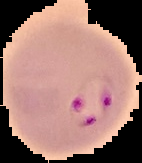

In [3]:
# .size attribute shows the shape of the image
print(img.size)
# display function shows the image
display(img)

# Image manipulation 

Pillow can do a number of image manipulations. For instance:

cropped image:


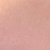

rotated image:


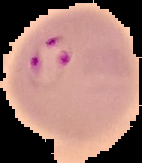

flipped image right to left:


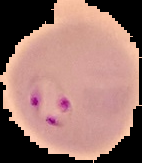

In [4]:
# image cropping
# the order is the following: (left, upper, right, bottom)
print('cropped image:')
img_crop = img.crop((25, 25, 75, 75))
display(img_crop)

# image rotation
# image rotation is accomplished by the .rotate() method
print('rotated image:')
display(img.rotate(180))

# flipping images
# to flip images use the .transpose() method
# transpose takes integer arguments for different results
print('flipped image right to left:')
display(img.transpose(0))

# EDA
## How are images read?

Images are read as an array of numbers ranging from color intesity. By adding colors the array becomes a 3D array with a depth of 3 representing the 3 main color channels: Red, Green, and Blue.

In [5]:
# using numpy to conver the image to an array
img_data = np.array(img)
print(f'Shape of array: {img_data.shape}')

Shape of array: (163, 142, 3)


As stated by the shape of the array, our image has a width of 163, a height of 142, and a depth of 3. The colors are stored in the 3 column of the array and we can see the different image take on the different colors using 'matplotlib' and the 'cmap' parameters.

Image with red tint:


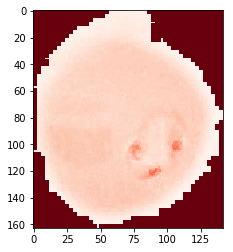

Image with green tint:


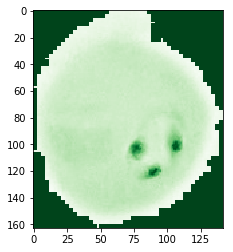

Image with blue tint:


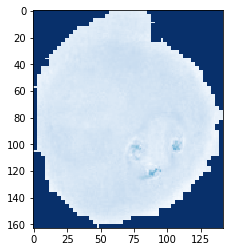

In [6]:
print(f'Image with red tint:')
img_red = img_data[:, :, 0]
plt.imshow(img_red, cmap=plt.cm.Reds_r)
plt.show()

print(f'Image with green tint:')
img_grn = img_data[:, :, 1]
plt.imshow(img_grn, cmap=plt.cm.Greens_r)
plt.show()

print(f'Image with blue tint:')
img_blu = img_data[:, :, 2]
plt.imshow(img_blu, cmap=plt.cm.Blues_r)
plt.show()

We can see what colors dominate an image by plotting a KDE plot. Colors that appear more to the right means that the image dominated more by that color and colors that appear on the left means that image has less of an impact on the image.

KDE plots need to be 1-dimensional. In order to do that we will use the .flatten() method from numpy.

original shape: (163, 142, 3)
flattend shape: (69438,)


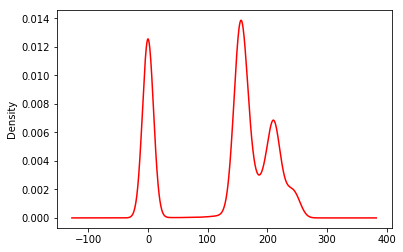

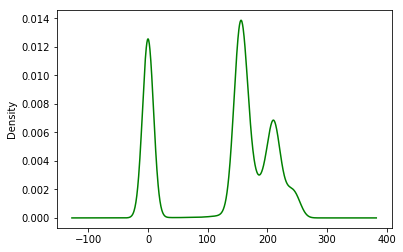

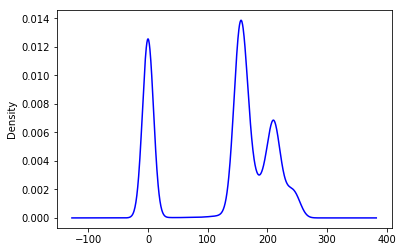

In [7]:
img_flat = img_data.flatten()
print(f'original shape: {img_data.shape}')
print(f'flattend shape: {img_flat.shape}')

# turn the flattened array into a pandas series
pd.Series(img_flat).plot.density(c='r')
plt.show()
pd.Series(img_flat).plot.density(c='g')
plt.show()
pd.Series(img_flat).plot.density(c='b')
plt.show()

The densities are all the same, probably because it's meshing all the colors into one array. We'll try to separate the colors to see if that will change the densities.

Red shape: (23146,)


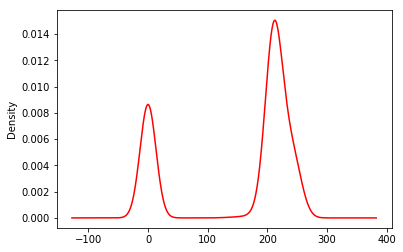

Green shape: (23146,)


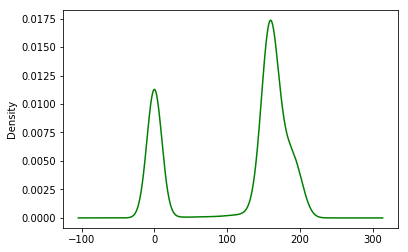

Blue shape: (23146,)


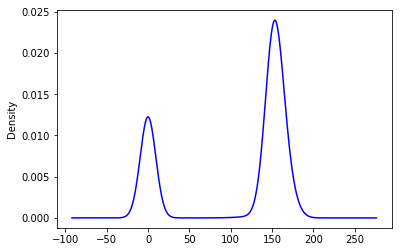

In [8]:
# flatten red array
red_flat = img_data[:, :, 0].flatten()
print(f'Red shape: {red_flat.shape}')
pd.Series(red_flat).plot.density(c='r')
plt.show()

# flatten green array
grn_flat = img_data[:, :, 1].flatten()
print(f'Green shape: {grn_flat.shape}')
pd.Series(grn_flat).plot.density(c='g')
plt.show()

#flatten blue array
blu_flat = img_data[:, :, 2].flatten()
print(f'Blue shape: {blu_flat.shape}')
pd.Series(blu_flat).plot.density(c='b')
plt.show()

This is a good start we can see the ranges of each color, each starts at -100, but end at different levels. Red ends close to 400, green ends above 300, and blue ends at over 250. We can gain a better insight when we put each color into the same KDE plot.

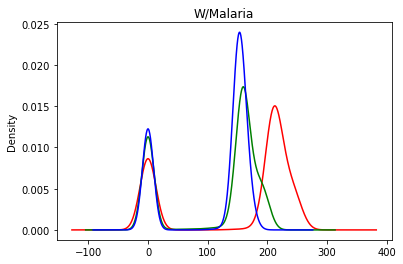

In [9]:
# create a dictionary for the colors
channels = {0:'red', 1:'green', 2:'blue'}
for k, v in channels.items():
    data = img_data[:, :, k].flatten()
    pd.Series(data).plot.density(c=v)
plt.title('W/Malaria')
plt.show()

So far we've been experimenting with a cell that is infected with malaria, let's swtich gears and move onto a cell that is healthy.

Size: (115, 115)
Array shape: (115, 115, 3)
Flattened array: (39675,)


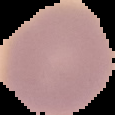

In [10]:
img2 = Image.open('./cell_images/Uninfected/C1_thinF_IMG_20150604_104722_cell_9.png')
print(f'Size: {img2.size}')
img2_data = np.array(img2)
print(f'Array shape: {img2_data.shape}')
img2_flat = img2_data.flatten()
print(f'Flattened array: {img2_flat.shape}')
display(img2)

Now let's see what the KDE plot looks like for a healthy cell

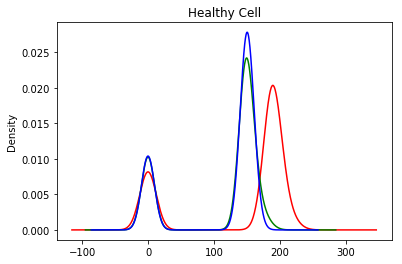

In [11]:
for k,v in channels.items():
    data = img2_data[:, :, k].flatten()
    pd.Series(data).plot.density(c=v)
plt.title('Healthy Cell')
plt.show()

Looking at the KDE it looks like the color range of a healthy cell is less than that of an infected cell. That is probably due to the red infected area as seen on the lower right corner of the infected area.

# Converting to greyscale 

In [12]:
from skimage.color import rgb2grey

Color shape: (163, 142, 3)
Grey shape: (163, 142)


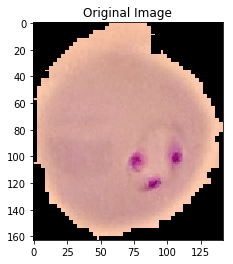

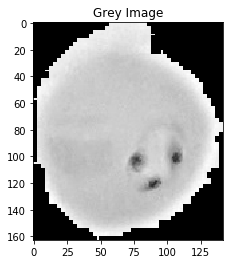

In [13]:
img_grey = rgb2grey(img_data)
print(f'Color shape: {img_data.shape}')
print(f'Grey shape: {img_grey.shape}')
plt.imshow(img_data)
plt.title('Original Image')
plt.show()
plt.imshow(img_grey, cmap=plt.cm.gray)
plt.title('Grey Image')
plt.show()

## KDE Plot for Greyscale

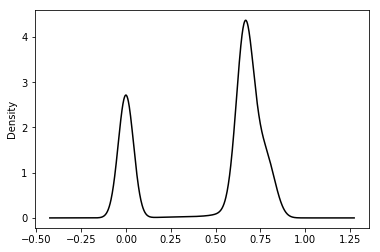

In [14]:
pd.Series(img_grey.flatten()).plot.density(c='k')
plt.show()

# Creating DataFrames

We'll load the directories for the infected cells and healthy cells into separate dataframes then concatenatet them together with a new column called infected to classify each observation whether it's infected by malaria or not.

In [15]:
healthy = glob.glob('./cell_images/Uninfected/*.png')
healthy = {k:v for k, v in enumerate(healthy)}
parasitized = glob.glob('./cell_images/Parasitized/*.png')
parasitized = {k:v for k, v in enumerate(parasitized)}
print(f'Number of healthy images: {len(healthy)}')
print(f'Number of parasitized images: {len(parasitized)}')

Number of healthy images: 13779
Number of parasitized images: 13779


In [16]:
type(healthy)

dict

## Creating labels for images

In [17]:
df_healthy = pd.DataFrame({'infected':healthy.values()})
df_infected = pd.DataFrame({'infected':parasitized.values()})

In [18]:
df_healthy['infected'] = 0
df_infected['infected'] = 1
df = pd.concat([df_healthy, df_infected], ignore_index=True)
df.shape

(27558, 1)

In [19]:
df.head()

,infected
0,0
1,0
2,0
3,0
4,0


In [20]:
# function for creating the separate dataframes:
def open_image(path):
    '''
    Converts an image into an array.
    ----
    folder_name: folder path
    img_num: index of image to convert (int, slice)
    ----
    returns a multi-dimensional array
    '''
    
    img = Image.open(path).resize(size=(100, 100))
    return np.array(img)

In [21]:
test_img = open_image(healthy[1])
test_img.shape

(100, 100, 3)

# HOGs for Machine Learning 

## What is HOG?

HOGs stands for histogram of oriented gradients. What HOGs does is it converts an image than can be inferred by machines by the direction of light that bounces of an object.

<img src='./plot_hog_1.png'>

HOGs can be imported from sklearn.image as follows:

In [22]:
from skimage.feature import hog

## Run HOG

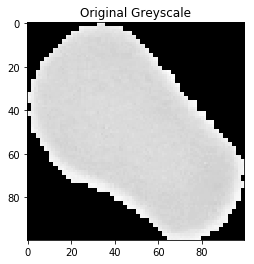

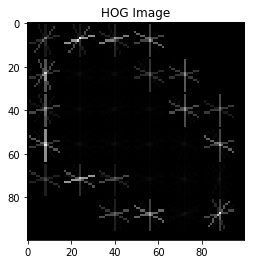

(1296,)


In [23]:
grey_image = rgb2grey(test_img)

hog_features, hog_image = hog(grey_image, visualise=True, block_norm='L2-Hys', pixels_per_cell=(16, 16))

# show original image
plt.imshow(grey_image, cmap=plt.cm.gray)
plt.title('Original Greyscale')
plt.show()
# show the hog image in greyscale
plt.imshow(hog_image, cmap=plt.cm.gray)
plt.title('HOG Image')
plt.show()
print(hog_features.shape)

In [24]:
def hog_convert(img):
    '''
    Takes an image an returns the HOG features as a 1-D array
    ------
    img: image to convert
    ------
    returns:
    flat_features: 1-D array
    '''
    # flatten the image to a 1-D array
    flat_image = img.flatten()
    # convert image to greyscale
    grey_image = rgb2grey(img)
    # extract hog features
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # stack the flattened image and the hogfeatures horizontally
    flat_features = np.hstack((flat_image, hog_features))
    # return flattened image and hog features
    return flat_features

In [25]:
color = open_image(parasitized[1])
test_hog = hog_convert(color)
print(test_hog.shape)
rgb2grey(color).shape

(31296,)


(100, 100)

In [26]:
# flatten the image to a 1-D array
flat_image = color.flatten()
print(flat_image.shape)
# # convert image to greyscale
grey_image = rgb2grey(color)
print(grey_image.shape)
# # extract hog features
hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
print(hog_features.shape)
# # stack the flattened image and the hogfeatures horizontally
flat_features = np.hstack((flat_image, hog_features))
print(flat_features.shape)
# # return flattened image and hog features

(30000,)
(100, 100)
(1296,)
(31296,)


# Matrix of Images 

In [27]:
df.shape

(27558, 1)

In [28]:
def create_matrix(folders):
    '''
    Create a matrix of feature from imported images.
    '''
    # empty list to store features
    feature_list = []
    for folder in folders:
        for v in folder:
            # load the image
            img = open_image(v)
            # get image features
            image_features = hog_convert(img)
            feature_list.append(image_features)
    feature_matrix = np.array(feature_list)
    
    return feature_matrix

In [29]:
healthy_short = {healthy[k] for k in range(500)}
parasitized_short = {parasitized[k] for k in range(500)}

In [30]:
feature_matrix = create_matrix([healthy_short, parasitized_short])

In [31]:
feature_matrix.shape

(2000, 31296)

# Image Compression with PCA

## Scale the data

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()
scaled_matrix = scaler.fit_transform(feature_matrix)
scaled_matrix.shape

(2000, 31296)

## Apply PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(.99)
matrix_pca = pca.fit_transform(scaled_matrix.copy())
print(f'Original shape: {feature_matrix.shape}')
print(f'PCA shape: {matrix_pca.shape}')

Original shape: (2000, 31296)
PCA shape: (2000, 1330)


The optimal numbers of features to retain is 404 that will retain 95% of the explained variance out of the 31,296 features we started with.

# Model Training

Since the original numpy array was too large the labels will need to be recreated to align with the new matrix.

In [45]:
df_short = pd.concat([df_healthy[:500], df_infected[:500]], ignore_index=True)
print(df_short.shape)
print(df_short['infected'].value_counts())

(2000, 1)
1    1000
0    1000
Name: infected, dtype: int64


In [46]:
features_short = pd.DataFrame(matrix_pca)
print(features_short.shape)
df_new = pd.concat((features_short, df_short), axis=1)
print(df_new.shape)
df_new['infected'].value_counts()

(2000, 1330)
(2000, 1331)


1    1000
0    1000
Name: infected, dtype: int64

In [47]:
X = df_new.drop(columns=['infected'])
y = df_new['infected']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

## Support Vector Machines(SVMs)

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [52]:
svm = SVC(kernel='linear', probability=True, random_state=44)
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=44, shrinking=True,
  tol=0.001, verbose=False)

In [53]:
from sklearn.metrics import confusion_matrix

In [56]:
y_pred = svm.predict(X_test)
print(f'SVM Model Accuracy: {svm.score(X_test, y_test)}')

SVM Model Accuracy: 0.7925


In [72]:
confusion_matrix(y_test, y_pred)

array([[165,  35],
       [ 48, 152]])

In [89]:
def cm_matrix(y_test, y_pred):
    '''
    Plots a confusion matrix using seaborn's heatmap.
    -----
    y_test: array of test values
    y_pred: array of predicted values
    '''
    cm = confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, index=['Positive', 'Negative'], columns=['Positive', 'Negative'])
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_cm, annot=True, fmt='g')
    plt.show();

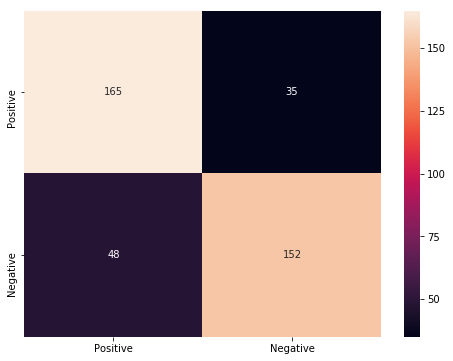

In [90]:
cm_matrix(y_test, y_pred)

The SVM model was able to get a correct prediction 77.5% of the time. Let's see if any other models perform better.

## K-Nearest Neighbors

The second model will be the K-Nearest Neighbors classifier. To do this the sklearn library will be used.

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [58]:
n_params = {'n_neighbors': [i for i in range(1,10)]}

In [59]:
knn = KNeighborsClassifier()

In [93]:
knn_cv = GridSearchCV(knn, n_params, cv=5)
knn_cv.fit(X_train, y_train)
print(f'Best score: {knn_cv.best_score_}')
print(f'Best parameter: {knn_cv.best_params_}')

Best score: 0.590625
Best parameter: {'n_neighbors': 9}


In [94]:
y_pred = knn_cv.predict(X_test)
knn_cv.score(X_test, y_test)

0.5875

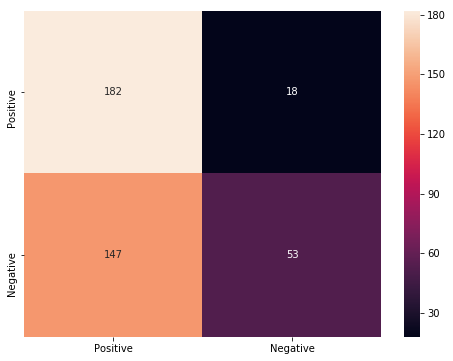

In [95]:
cm_matrix(y_test, y_pred)

The initial model for KNN performed poorly, only classifying 62.5% of the data correctly. To find an optimal number for K, I'll iterate through a range of K-values and plot them to see which produces the best score for accuracy.

# Logisitic Regression 

## Feature selection for Logistic Regression with Lasso

In [62]:
from sklearn.linear_model import LogisticRegression

In [96]:
# create new train and test splits
X_train, X_test, y_train, y_test = train_test_split(scaled_matrix, y, test_size=0.2, random_state=44)

In [97]:
params = {'penalty':['l1', 'l2'], 'C': [0.01, 0.1, 0.25, 0.5, 0.75, 0.99]}

In [98]:
logreg = LogisticRegression(penalty='l1')
logreg_cv = GridSearchCV(logreg, params, cv=5)

In [99]:
logreg_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 0.25, 0.5, 0.75, 0.99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [100]:
print(f'Best parameters: {logreg_cv.best_params_}')
print(f'Best score: {logreg_cv.best_score_}')

Best parameters: {'C': 0.1, 'penalty': 'l1'}
Best score: 0.833125


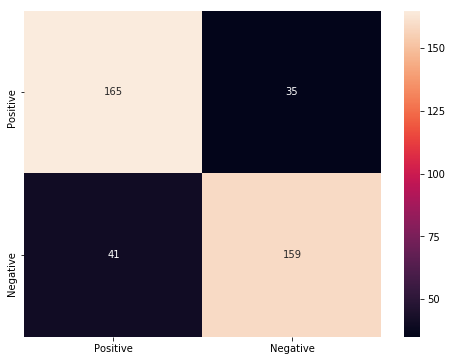

Accuracy: 0.81


In [111]:
y_pred = logreg_cv.predict(X_test)
cm_matrix(y_test, y_pred)
print(f'Accuracy: {logreg_cv.score(X_test, y_test)}')

A value of 0.1 for C is the best parameter. Let's see if there is a value between 0.01 and 0.1 that has a better score.

In [102]:
params2 = {'C':np.arange(0.01, 0.11, 0.01)}

In [103]:
logreg2 = LogisticRegression(penalty='l1')
logreg_cv2 = GridSearchCV(logreg2, param_grid=params2, cv=5)
logreg_cv2.fit(X_train, y_train)
print(f'Best Params(C): {logreg_cv2.best_params_}')
print(f'Best score: {logreg_cv2.best_score_}')

Best Params(C): {'C': 0.060000000000000005}
Best score: 0.83875


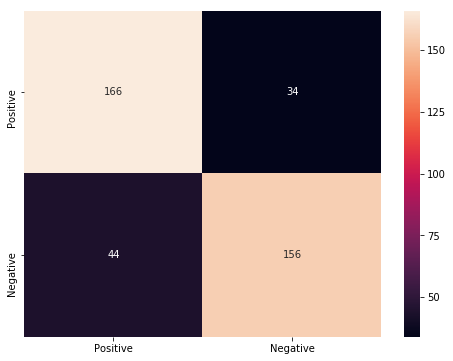

Accuracy: 0.805


In [109]:
y_pred2 = logreg_cv2.predict(X_test)
cm_matrix(y_test, y_pred2)
print(f'Accuracy: {logreg_cv2.score(X_test, y_test)}')

A C value of 0.06 is better, but the difference is hardly noticeable. 

# Conclusion

The best models that came up on top were SVMs and Logisitic Regression with scores of 79% and 81%. KNN was a measly 65% with a large number of false positives.